# Apply SVM with CV

In [1]:
import pandas as pd
df = pd.read_csv ('finalfeaturelist.csv')
print(df)

    Unnamed: 0  orf_length  orf_coverage       Q1      Q2  max_value  \
0            0         228      0.320225   658.50   676.0        711   
1            1         111      0.207477   495.00   508.0        535   
2            2         258      0.217355  1098.25  1127.5       1187   
3            3         225      0.381356   545.50   560.0        591   
4            4         240      0.087336  2542.25  2610.5       2747   
..         ...         ...           ...      ...     ...        ...   
83          83         765      0.238021   748.75   768.5        810   
84          84        1035      0.445353   619.25   635.5        670   
85          85         597      0.544211  1642.00  1686.0       1775   
86          86         291      0.345606   360.50   370.0        391   
87          87         291      0.348086   562.75   577.5        607   

    min_value       snr  signal_n3  UP_Frequency     MFE  LogValueLnc  \
0         641  0.000944        239      0.129213  -240.7     0

In [2]:
#training an svm model using above features

#make the y label vector
import numpy as np
arr = np.empty(88, dtype=object) 
#print(arr)

for i in range(0,int(len(arr)/2)):
    arr[i]=1
    
for i in range(int(len(arr)/2),len(arr)):
    arr[i]=0
    
print(arr)
print(len(arr))
arr=arr.astype('int')   
    


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
88


In [3]:
df = df.drop(df.columns[0], axis=1)
df

,orf_length,orf_coverage,Q1,Q2,max_value,min_value,snr,signal_n3,UP_Frequency,MFE,LogValueLnc,LogValuePct,LogRatio,LogValueLncaD,LogValuePctaD,LogRatioaD,LogValueLncaA,LogValuePctaA,LogRatioaA
0,228,0.320225,658.50,676.0,711,641,0.000944,239,0.129213,-240.7,0.468864,1.000000,0.468864,-0.061380,1.000000,-0.061380,0.841464,1.000000,0.841464
1,111,0.207477,495.00,508.0,535,482,0.001232,176,0.099065,-195.5,0.447024,1.000000,0.447024,-0.203933,1.000000,-0.203933,0.830947,1.000000,0.830947
2,258,0.217355,1098.25,1127.5,1187,1069,0.000558,393,0.112890,-403.6,0.399569,1.000000,0.399569,-0.374966,1.000000,-0.374966,0.814854,1.000000,0.814854
3,225,0.381356,545.50,560.0,591,531,0.001140,198,0.106780,-214.9,0.411253,1.000000,0.411253,-0.212536,1.000000,-0.212536,0.829671,1.000000,0.829671
4,240,0.087336,2542.25,2610.5,2747,2474,0.000243,918,0.109898,-850.1,0.407049,1.000000,0.407049,-0.742786,1.000000,-0.742786,0.776945,1.000000,0.776945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,765,0.238021,748.75,768.5,810,729,0.000829,271,0.115121,-1526.0,1.000000,-0.348281,-2.871249,1.000000,-0.993607,-1.006434,1.000000,0.684805,1.460271
84,1035,0.445353,619.25,635.5,670,603,0.000989,221,0.115318,-963.7,1.000000,-0.455741,-2.194227,1.000000,-0.733902,-1.362580,1.000000,0.709423,1.409597
85,597,0.544211,1642.00,1686.0,1775,1598,0.000374,589,0.113036,-479.0,1.000000,-0.300175,-3.331388,1.000000,-0.493229,-2.027457,1.000000,0.739010,1.353161
86,291,0.345606,360.50,370.0,391,351,0.001687,128,0.118765,-388.4,1.000000,-0.184979,-5.406025,1.000000,-0.434024,-2.304019,1.000000,0.745312,1.341721


In [4]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm




# create dataset
#X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=11, random_state=1, shuffle=True)
# create model
model = svm.SVC(kernel='linear')
# evaluate model
scores = cross_val_score(model, df, arr, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.989 (0.036)


In [36]:
df2 = df.drop(df.columns[[8,9,13,14,15,16,17,18]], axis=1)


In [29]:
cv = KFold(n_splits=11, random_state=1, shuffle=True)
# create model
model = svm.SVC(kernel='linear')
# evaluate model
scores = cross_val_score(model, df2, arr, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.989 (0.036)


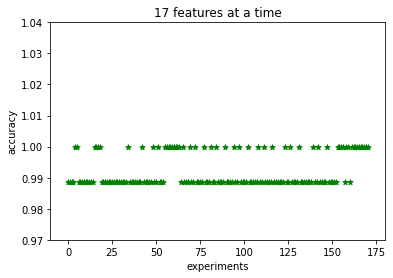

In [31]:
# importing the required module
import matplotlib.pyplot as plt
 
# x axis values
x = list(range(0,171))
# corresponding y axis values
y = accuracy
 
# plotting the points
plt.scatter(x, y, label= "stars", color= "green",
            marker= "*", s=30)
 
# naming the x axis
plt.xlabel('experiments')
# naming the y axis
plt.ylabel('accuracy')

plt.ylim(0.97,1.04)
plt.xlim(-10,180)
 
# giving a title to my graph
plt.title('17 features at a time')
 
# function to show the plot
plt.show()

In [34]:
# three features at a time
from itertools import combinations
colnums=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
  
# size of combination is set to 3
a = combinations(colnums, 8) 
y = [list(i) for i in a]
  
len(y)
#print(y)

75582

In [27]:
accuracy=[]
for i in range(0,len(y)):
    df3=df.iloc[:,y[i]]
    cv = KFold(n_splits=11, random_state=1, shuffle=True)
    # create model
    model = svm.SVC(kernel='linear')
    # evaluate model
    scores = cross_val_score(model, df3, arr, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    accuracy.append(mean(scores))
    #print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    

In [20]:
w1=pd.DataFrame(list(zip(y,accuracy)))


In [28]:
accuracy

[0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 1.0,
 1.0,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 1.0,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 1.0,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363636,
 1.0,
 0.9886363636363636,
 0.9886363636363636,
 1.0,
 0.9886363636363636,
 0.9886363636363636,
 0.9886363636363